# Decision Trees

**Decision trees** are **supervised learning** algorithms that predict the value of a target variable based on several input variables. There are two main types of tree models, classification trees and regression trees. Decision trees are extremely popular amongst machine learning algorithms given their intelligibility and simplicity because they produce algorithms that are easy to interpret and visualize. Decision trees are non-parametric, meaning they make minimal assumptions about the underlying distribution of the data being studied

## General Logic
A decision tree is a simple representation for classifying examples. It is comprised of input and target features. There can be multiple input features in a tree but only one target feature called the "classification." Each element in the domain of the classification is called a class. 

Decision trees are comprised of internal and leaf nodes. Internal nodes are labeled with an input feature and are connected to either possible values of the target feature (leaf node) or subordinate decision nodes (internal nodes) with the connection being a decision boundary. Leaf nodes are label with either a class or a probability distribution over the classes.

A tree is built by splitting the source set, the root node, into subsets which constitute the successor children. The splitting is based on a set of rules based on features. This process is repeated in a recursive manner called recursive partioning and is completed when the subset at a node has all the same values of the target feature or when splitting no longer adds value to the predictions. This process is an example of a greedy algorithm and is the most common strategy for learning decision trees from data.

## Types of Decision Trees
- **Classification tree**: When the predicted outcome is the class (discrete) to which the data belongs
- **Regression tree**: When the predicted outcome can be considered a real number
- *Other types of tree-based machine learning algorithms like boosting and random forest are not covered here.*

## Metrics
Algorithms for constructing decision trees usually work top-down, by choosing a variable at each step that best splits the set of items. Different algorithms use different metrics for measuring "best." Common examples are listed below

### Estimate of Postive Correctness
A simple and effective metric which identifies the degree to which true positives outweigh false positives, defined as:
$$
E_P = TP - FP
$$
In this equation, the total false positives are subtracted from the total true positives, resulting in an estimate on how many positive examples the feature could correctly identify within the data, with higher numbers meaning the feature could correctly classify more positive samples.

It should be known that this number is only an estimate. In instances where two features have an identical FP value while one of the features has a higher TP value, that feature would be ranked higher because it gives a higher value. To combat this, using Sensitivity to obtain the true positive rate (TPR) allows for better estimation of positive correctness.

$$
TPR = TP/(TP+FN)
$$

### Gini Impurity
Gini impurity measures how often a randomly chosen element of a set would be incorrectly labeled if it were labeled randomly and independently according to the distribution of labels in the set. It reaches its minimum (zero) when all cases in the node fall into a single target category.

For a set of items with $J$ classes and relative frequences $p_i, i \in {1, 2, \dots, J}$, the probability of chosing an item with label $i$ is $p_i$, and the probabilityof miscategorizing that item is $\sum_{k\ne i}p_k = 1 - p_i$. The Gini impurity is computed by summing pairwise products of these probabilities for each class label:
$$
\mathrm{I}_G(p) = \sum_{i=1}^{J}\left(p_i\sum_{k\ne i}p_k\right) = \sum_{i=1}^{J}p_i(1-p_i) = \sum_{i=1}^{J}(p_i - p_i^2) = \sum_{i=1}^{J}p_i - \sum_{i=1}^{J}p_i^2 = 1 - \sum_{i=1}^{J}p_i^2
$$

### Information Gain
Based on the concept of entropy and information content from information theory, seek further readings for more detail.

### Variance Reduction
Seek further readings.

## When to Use, Not to Use, Pros and Cons
Decision trees are best used in cases where simple and interpretable classification/regression models are needed. There are not ideal in cases where data is complex or noisy.

**Pros**:
- Simple to understand and interpret
- Able to handle both numerical and categorical data
- Little data preparation
- Non-parametric
- Mirrors human decision making
- Built-in feature selection

**Cons**:
- Small changes in training data can cause large changes in the tree
- Learning an optimal tree is NP-complete
- Can result in over-complex trees that do not generalize well

## Further Topics
- Pruning
- Decision graphs
- Notable decision tree algorithms
- Ensemble methods
- Boosted trees
- Bootstrap aggregated decision trees

# Coding
In this section, we will implement an example classification tree.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('../data/diabetes.csv', header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df[col_names[:-1]]
y = df.label

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [6]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7337662337662337


[Text(0.4619891826923077, 0.9642857142857143, 'glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1661658653846154, 0.8928571428571429, 'age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.31407752403846156, 0.9285714285714286, 'True  '),
 Text(0.06009615384615385, 0.8214285714285714, 'bmi <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.019230769230769232, 0.75, 'pedigree <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.009615384615384616, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.028846153846153848, 0.6785714285714286, 'pedigree <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.019230769230769232, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.038461538461538464, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.10096153846153846, 0.75, 'bp <= 37.0\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.09

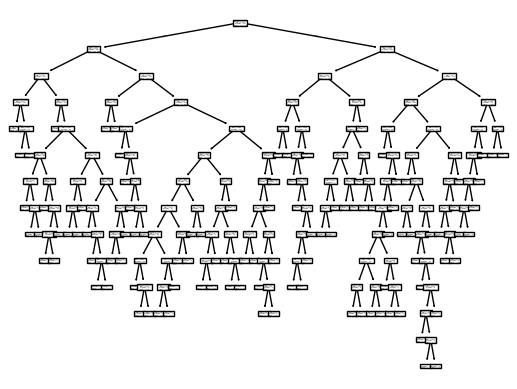

In [8]:
from sklearn import tree
tree.plot_tree(clf, feature_names=col_names)

## Optimizing Performance

In [12]:
# entropy criterion and max depth 3
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7662337662337663


[Text(0.5, 0.875, 'glucose <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'age <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'bmi <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'bmi <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'bmi <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'glucose <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsampl

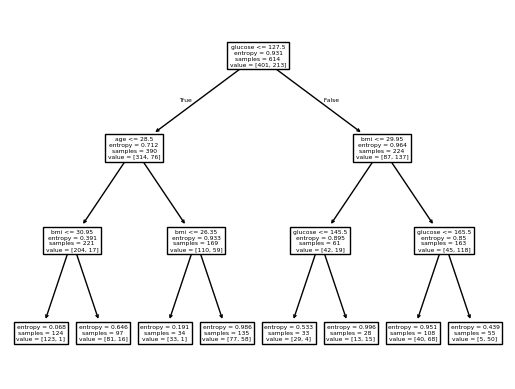

In [13]:
tree.plot_tree(clf, feature_names=col_names)